<a href="https://colab.research.google.com/github/el-muarrof/restieval-breast-cancer_171-173/blob/main/binary_scenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load_datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DATASET_TKC_NEW/

/content/drive/MyDrive/DATASET_TKC_NEW


In [ ]:
!unzip breast.zip -d /content/drive/MyDrive/DATASET_TKC_NEW/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/DATASET_TKC_NEW/breast/malignant/ductal_carcinoma/SOB_M_DC_14-11031/100X/SOB_M_DC-14-11031-100-009.png  
  inflating: /content/drive/MyDrive/DATASET_TKC_NEW/breast/malignant/ductal_carcinoma/SOB_M_DC_14-11031/100X/SOB_M_DC-14-11031-100-011.png  
  inflating: /content/drive/MyDrive/DATASET_TKC_NEW/breast/malignant/ductal_carcinoma/SOB_M_DC_14-11031/100X/SOB_M_DC-14-11031-100-016.png  
  inflating: /content/drive/MyDrive/DATASET_TKC_NEW/breast/malignant/ductal_carcinoma/SOB_M_DC_14-11031/100X/desktop.ini  
   creating: /content/drive/MyDrive/DATASET_TKC_NEW/breast/malignant/ductal_carcinoma/SOB_M_DC_14-11031/400X/
  inflating: /content/drive/MyDrive/DATASET_TKC_NEW/breast/malignant/ductal_carcinoma/SOB_M_DC_14-11031/400X/SOB_M_DC-14-11031-400-010.png  
  inflating: /content/drive/MyDrive/DATASET_TKC_NEW/breast/malignant/ductal_carcinoma/SOB_M_DC_14-11031/400X/SOB_M_DC-14-11031-400-015.png  
  inflating

In [ ]:
!rm --help

Usage: rm [OPTION]... [FILE]...
Remove (unlink) the FILE(s).

  -f, --force           ignore nonexistent files and arguments, never prompt
  -i                    prompt before every removal
  -I                    prompt once before removing more than three files, or
                          when removing recursively; less intrusive than -i,
                          while still giving protection against most mistakes
      --interactive[=WHEN]  prompt according to WHEN: never, once (-I), or
                          always (-i); without WHEN, prompt always
      --one-file-system  when removing a hierarchy recursively, skip any
                          directory that is on a file system different from
                          that of the corresponding command line argument
      --no-preserve-root  do not treat '/' specially
      --preserve-root   do not remove '/' (default)
  -r, -R, --recursive   remove directories and their contents recursively
  -d, --dir             remove e

In [ ]:
import os 

for a, b, c in os.walk('/content/drive/MyDrive/DATASET_TKC_NEW/breast'):
  for d in os.listdir(a):
    if '.ini' in d:
      !rm -r ./desktop.ini

## core_split

In [ ]:
import os

list_dir_def = lambda base_dir, dir_name: [x for x in os.listdir(os.path.join(base_dir, dir_name))]


def find_list_dir(subclasses_benign, _subclass_malignant, _path_ori_benign, _path_ori_malignant):
    """
    find list dir available prefix on SOB
    :param _path_ori_malignant:
    :param _path_ori_benign:
    :param subclasses_benign:
    :param _subclass_malignant:
    :return: dictionary with keys subclasses of labels
    """
    _list_dir_result = {}
    for _classes in subclasses_benign:
        if _classes not in _list_dir_result: _list_dir_result[_classes] = {}
        _list_dir_result[_classes]['list'] = list_dir_def(_path_ori_benign, _classes)
        _list_dir_result[_classes]['path'] = _path_ori_benign
    for _classes in _subclass_malignant:
        if _classes not in _list_dir_result: _list_dir_result[_classes] = {}
        _list_dir_result[_classes]['list'] = list_dir_def(_path_ori_malignant, _classes)
        _list_dir_result[_classes]['path'] = _path_ori_malignant
    return _list_dir_result


def file_splitting(list_dir_subclass, path_ori_class, magnifications, dir_name_subclass):
    """
    Find list image
    :param list_dir_subclass:
    :param path_ori_class:
    :param magnifications:
    :param dir_name_subclass:
    :return:
    """
    _list_file_ori_dir = []
    for _subclass_dir in list_dir_subclass:
        for _x in magnifications:
            _dir_path = os.path.join(path_ori_class, dir_name_subclass, _subclass_dir, _x)
            for (_dir_path, dir_names, filenames) in os.walk(_dir_path):
                for _file in filenames:
                    _list_file_ori_dir.append(os.path.join(_dir_path, _file))
    return _list_file_ori_dir


def file_splitting_subclass(_list_dir_subclasses, _subclasses, _list_magnification):
    """
    Wrapper function of file_splitting
    :param _list_magnification:
    :param _subclasses:
    :param _list_dir_subclasses:
    :return: dictionary
    """
    for _class in _subclasses:
        _list_dir_subclasses[_class]['split'] = file_splitting(
            _list_dir_subclasses[_class]['list'],
            _list_dir_subclasses[_class]['path'],
            _list_magnification,
            _class
        )
    return _list_dir_subclasses


test_len = lambda len_x, rate_test: int((rate_test / 100) * len(len_x))

val_len = lambda len_x, rate_val: int((rate_val / 100) * len(len_x))


def get_info_total(_list_file_classes, _subclass):
    """
    Print information images on all subclasses
    :param _subclass:
    :param _list_file_classes:
    :return: void
    """
    _total_all = 0
    for _class in _subclass:
        _total = len(_list_file_classes[_class]['split'])
        print("{} class have total images {}".format(_class, _total))
        _total_all += _total
    print("total images all class {}".format(_total_all))


def build_dict_magnification_subclasses(_list_subclasses):
    """
    builder dictionary on multi subclass to be used in splitting file
    :param _list_subclasses:
    :return: dictionary
    """
    _dict_magnification_subclasses = {}
    for _sub_class in _list_subclasses:
        for _file in _sub_class:
            _lvl = _file.split("\\")[3]
            _scl = _file.split("/")[2].split("\\")[1]
            if _lvl not in _dict_magnification_subclasses:
                _dict_magnification_subclasses[_lvl] = {}
            if _scl not in _dict_magnification_subclasses[_lvl]:
                _dict_magnification_subclasses[_lvl][_scl] = []
            _dict_magnification_subclasses[_lvl][_scl].append(_file)
    return _dict_magnification_subclasses


def build_dict_magnification_binary(_list_subclass):
    """
    builder dictionary on binary class to be used in splitting file
    :param _list_subclass:
    :return:
    """
    _dict_magnification = {}
    for _sub_class in _list_subclass:
        for _file in _sub_class:
            _lvl = _file.split("/")[4]
            if _lvl not in _dict_magnification:
                _dict_magnification[_lvl] = [_file]
            else:
                _dict_magnification[_lvl].append(_file)
    return _dict_magnification

def query_result_split_binary(_list_file_classes, _path):
    """
    query to find where is as binary class
    :param _list_file_classes:
    :param _path:
    :return:
    """
    _query_result = []
    for _classes in _list_file_classes:
        if _list_file_classes[_classes]['path'] == _path:
            _query_result.append(_list_file_classes[_classes]['split'])
    return _query_result


## split_image_binary

In [ ]:
import os
import shutil
import numpy as np
import core_split as split

"""
List variable as parameter as listed below, carefully change value as dependency
"""
path_ori_benign = 'breast/benign'
path_ori_malignant = 'breast/malignant'
path_binary_scenario = 'binary_scenario'
list_magnification = ['40X', '100X', '200X', '400X']
sub_class_benign = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma']
sub_class_malignant = ['ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma']
subclasses = ['tubular_adenoma', 'phyllodes_tumor', 'papillary_carcinoma',
              'mucinous_carcinoma', 'lobular_carcinoma', 'fibroadenoma',
              'ductal_carcinoma', 'adenosis']
rate_test = 10
rate_val = 10

os.mkdir(path_binary_scenario)

for _path_tr_vl in ['train','val','test']:
  os.mkdir(os.path.join(path_binary_scenario, _path_tr_vl))
  for _path_bs_ls_mag in list_magnification:
    os.mkdir(os.path.join(path_binary_scenario, _path_tr_vl, _path_bs_ls_mag))
    for _path_subclass in ['malignant','benign']:
      os.mkdir(os.path.join(path_binary_scenario, _path_tr_vl, _path_bs_ls_mag, _path_subclass))

if __name__ == '__main__':
    list_dir_subclasses = split.find_list_dir(
        sub_class_benign,
        sub_class_malignant,
        path_ori_benign,
        path_ori_malignant
    )
    list_file_classes = split.file_splitting_subclass(list_dir_subclasses, subclasses, list_magnification)
    get_info_total(list_file_classes, subclasses)

    list_sub_class_benign = query_result_split_binary(list_file_classes, path_ori_benign)
    list_sub_class_malignant = query_result_split_binary(list_file_classes, path_ori_malignant)
    dict_magnification_benign = build_dict_magnification_binary(list_sub_class_benign)
    dict_magnification_malignant = build_dict_magnification_binary(list_sub_class_malignant)

    # copying test image file
    already_test = []
    for _class in [dict_magnification_malignant, dict_magnification_benign]:
        for magnification in _class:
            len_test = split.test_len(_class[magnification], rate_test)
            rand = np.random.choice(len(_class[magnification]), len_test, False)
            for image in rand:
                if _class == dict_magnification_malignant:
                    xx = _class[magnification][image].split('/')[-1]
                    shutil.copy(_class[magnification][image],
                                os.path.join(path_binary_scenario, 'test', magnification,'malignant', xx))
                    
                else:
                    xx = _class[magnification][image].split('/')[-1]
                    shutil.copy(_class[magnification][image],
                                os.path.join(path_binary_scenario, 'test', magnification, 'benign', xx))
                already_test.append(_class[magnification][image])

    # copying validation image file
    dict_val_benign = {}
    dict_val_malignant = {}
    for magnification in list_magnification:
        dict_val_benign[magnification] = [x for x in dict_magnification_benign[magnification] if x not in already_test]
        dict_val_malignant[magnification] = [x for x in dict_magnification_malignant[magnification] if
                                             x not in already_test]
    
    already_val = []
    for _class in [dict_val_benign, dict_val_malignant]:
        for magnification in _class:
            len_input = split.val_len(_class[magnification], rate_val)
            rand = np.random.choice(len(_class[magnification]), len_input, False)
            for image in rand:
                if _class == dict_val_malignant:
                    xx = _class[magnification][image].split('/')[-1]
                    shutil.copy(_class[magnification][image],
                                os.path.join(path_binary_scenario, 'val', magnification, 'malignant', xx))
                    
                else:
                    xx = _class[magnification][image].split('/')[-1]
                    shutil.copy(_class[magnification][image],
                                os.path.join(path_binary_scenario, 'val', magnification, 'benign', xx))
                already_val.append(_class[magnification][image])

    # copying training file
    dict_tr_benign = {}
    dict_tr_malignant = {}
    for magnification in list_magnification:
        dict_tr_benign[magnification] = [x for x in dict_val_benign[magnification] if x not in already_val]
        dict_tr_malignant[magnification] = [x for x in dict_val_malignant[magnification] if x not in already_val]
    already_train = []
    for _class in [dict_tr_benign, dict_tr_malignant]:
        for magnification in _class:
            for image in _class[magnification]:
                if _class == dict_tr_malignant:
                    xx = image.split('/')[-1]
                    shutil.copy(image, os.path.join(path_binary_scenario, 'train', magnification, 'malignant', xx))
                else:
                    xx = image.split('/')[-1]
                    shutil.copy(image, os.path.join(path_binary_scenario, 'train', magnification, 'benign', xx))
                already_train.append(image)

## training_binary_sample_400

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from utils.conv_auto_encoder import ConvAutoEncoder
import numpy as np
import cv2
import os
import json

EPOCHS = 50
INIT_LR = 1e-3
BS = 32
IMAGE_SIZE = (256, 256)
base_dataset = "binary_scenario"
class_dir = ['malignant','benign']
type_dataset = ['val', 'train']

# make that checkpoint path dir are available
checkpoint_path = "checkpoint/cp.ckpt"

checkpoint_dir = os.path.dirname(checkpoint_path)
print("[INFO] indexing file images BreakHis dataset...")
dataset_train = []
dataset_val = []
for type_set in type_dataset:
    for class_item in class_dir:
        cur_dir = os.path.join(base_dataset, type_set,'400X' ,class_item)
        for file in os.listdir(cur_dir):
            if type_set == 'train':
                dataset_train.append(os.path.join(cur_dir, file))
            else:
                dataset_val.append(os.path.join(cur_dir, file))

print("[INFO] load images BreakHis dataset...")
#  load images
train_images = []
val_images = []
for type_set in type_dataset:
    cur_dataset = dataset_train if type_set == 'train' else dataset_val
    for image_path in cur_dataset:
        if ".png" in image_path:
            image = cv2.imread(image_path)
            image = cv2.resize(image, IMAGE_SIZE)
            if type_set == 'train':
                train_images.append(image)
            else:
                val_images.append(image)

# normalization
print("[INFO] normalization...")
train_x = np.array(train_images).astype("float32") / 255.0
val_x = np.array(val_images).astype("float32") / 255.0

print("[INFO] building auto encoder...")
auto_encoder = ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor="val_loss",
    verbose=1,
    mode='min',
    save_best_only=True)
auto_encoder.compile(loss="mse", optimizer=opt)
auto_encoder.summary()

# train the convolutional auto encoder
print("[INFO] training auto encoder...")
H = auto_encoder.fit(
    train_x, train_x,
    shuffle=True,
    validation_data=(val_x, val_x),
    epochs=EPOCHS,
    callbacks=[checkpoint_callback],
    batch_size=BS)

# save history training and model h5
#with open('training_binary_sample_400.json', 'w') as f:
#    json.dump(H.history, f)
#auto_encoder.save('training_binary_sample_400.h5')

[INFO] indexing file images BreakHis dataset...
[INFO] load images BreakHis dataset...
[INFO] normalization...
[INFO] building auto encoder...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 128)     0         
                                                                 
 enc_filter_128 (BatchNormal  (None, 128, 128, 128)    512       
 ization)                                                        
                                                                 
 flatten (Flatten)           (None, 2097152)           0         
                                                                 
 encoded (Dense)             (None, 48)                100663344 
                                                      

In [ ]:
auto_encoder = ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
# load our auto_encoder from disk
print("[INFO] loading auto encoder model...")
auto_encoder.load_weights(checkpoint_path)

# create the encoder model which consists of *just* the encoder
# portion of the auto encoder
encoder = Model(inputs=auto_encoder.input,
	outputs=auto_encoder.get_layer("encoded").output)

# quantify the contents of our input images using the encoder
print("[INFO] encoding images...")
features = encoder.predict(train_x)

[INFO] loading auto encoder model...
[INFO] encoding images...


In [ ]:
indexes = list(range(0, train_x.shape[0]))
features_array = [[float(x) for x in y] for y in features]
labels = [path.split("/")[3] for path in dataset_train]
data = {"indexes": indexes, "features": features_array, "locations": dataset_train, "labels":labels}

In [ ]:
with open('training_binary_sample_400_new.json', 'w') as f:
    json.dump(data, f)
auto_encoder.save('training_binary_sample_400_new.h5')

## retrieval_sample

[INFO] indexing file images BreakHis dataset...
[INFO] load images BreakHis dataset...
[INFO] normalization...


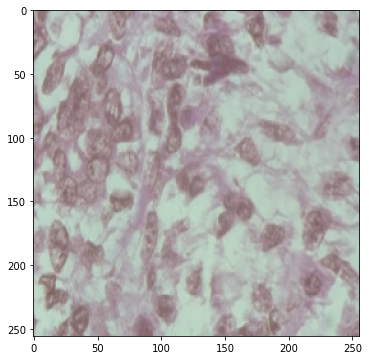

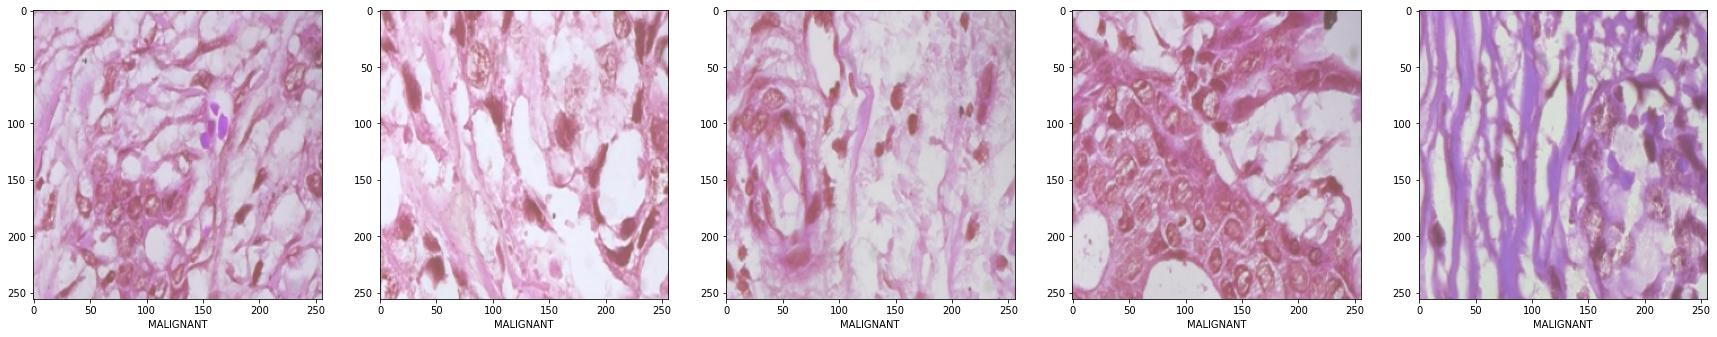

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import cv2
from utils.retrieval import perform_search
from utils.conv_auto_encoder import ConvAutoEncoder
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

base_dataset = "binary_scenario"
magnification = "400X"
class_dir = ['benign', 'malignant']
IMAGE_SIZE = (256, 256)
print("[INFO] indexing file images BreakHis dataset...")

if __name__ == "__main__":
    # indexing file images
    dataset = []
    for class_item in class_dir:
        cur_dir = os.path.join(base_dataset, 'test', magnification, class_item)
        for file in os.listdir(cur_dir):
            dataset.append(os.path.join(cur_dir, file))

    dataset_train = []
    for class_item in class_dir:
        cur_dir = os.path.join(base_dataset, 'train', magnification, class_item)
        for file in os.listdir(cur_dir):
            dataset_train.append(os.path.join(cur_dir, file))

    images_train = []
    for image_path in dataset_train:
        if ".png" in image_path:
            image = cv2.imread(image_path)
            image = cv2.resize(image, IMAGE_SIZE)
            images_train.append(image)

    print("[INFO] load images BreakHis dataset...")
    #  load images
    images = []
    images_test_label = []
    for image_path in dataset:
        if ".png" in image_path:
            image = cv2.imread(image_path)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            label = image_path.split(os.path.sep)[-2]
            images_test_label.append(label)

    # normalization
    print("[INFO] normalization...")
    test_x = np.array(images).astype("float32") / 255.0
    lb = LabelEncoder()
    test_y = lb.fit_transform(images_test_label)

    # 400X
    auto_encoder_400 = ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
    auto_encoder_400.load_weights("checkpoint/cp.ckpt")
    with open('training_binary_sample_400_new.json') as f:
        training_indexed_400 = json.load(f)
    encoder_400 = Model(inputs=auto_encoder_400.input,
                        outputs=auto_encoder_400.get_layer("encoded").output)

    test_sample = test_x[10, :, :, :].reshape(1, 256, 256, 3)

    features_retrieved_400 = encoder_400.predict(test_sample)

    query_indexes = list(range(0, test_x.shape[0]))
    label_builder = list(np.unique(training_indexed_400["labels"]))
    class_builder = {label_unique: [] for label_unique in label_builder}

    plt.figure(figsize=(6, 6))
    plt.imshow(test_x[10])
    plt.show()

    queryFeatures = features_retrieved_400[0]
    results = perform_search(queryFeatures, training_indexed_400, max_results=5)
    labels_ret = [training_indexed_400["labels"][r[1]] for r in results]

    i = 0
    f, axs = plt.subplots(1, 5)
    f.set_figheight(20)
    f.set_figwidth(30)
    for label in labels_ret:
        axs[i].imshow(images_train[results[i][1]])
        axs[i].set_xlabel(label.upper())
        i += 1
    plt.show()

## evaluasi

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import cv2
import copy
import sklearn.metrics as metric
from utils.retrieval import perform_search
from utils.conv_auto_encoder import ConvAutoEncoder
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

base_dataset = "binary_scenario"
magnification = "400X"
class_dir = ['benign', 'malignant']
IMAGE_SIZE = (256, 256)
print("[INFO] indexing file images BreakHis dataset...")


def euclidean(a, b):
	# compute and return the euclidean distance between two vectors
	return np.linalg.norm(a - b)

def perform_search(query_features, indexed_train, max_results=5):
	retrieved = []
	for idx in range(0, len(indexed_train["features"])):
		distance = euclidean(query_features, indexed_train["features"][idx])
		retrieved.append((distance, idx))
	retrieved = sorted(retrieved)[:max_results]
	return retrieved

print("[INFO] indexing file images BreaKHis dataset...")
# indexing file images
dataset = []
for class_item in class_dir:
    cur_dir = os.path.join(base_dataset, 'test', magnification, class_item)
    for file in os.listdir(cur_dir):
        dataset.append(os.path.join(cur_dir, file))
print("test len to retrieving:", len(dataset))
print("[INFO] load test images BreaKHis dataset...")
#  load images
images = []
for image_path in dataset:
    if ".png" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image, IMAGE_SIZE)
        images.append(image)

# normalization
print("[INFO] normalization...")
test_x = np.array(images).astype("float32") / 255.0

auto_encoder = ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
# load our auto_encoder from disk
print("[INFO] loading auto encoder model...")
auto_encoder.load_weights(checkpoint_path)
with open('training_binary_sample_400_new.json') as f:
  training_indexed = json.load(f)

# create the encoder model which consists of *just* the encoder
# portion of the auto encoder
encoder = Model(inputs=auto_encoder.input,
	outputs=auto_encoder.get_layer("encoded").output)

# quantify the contents of our input images using the encoder
print("[INFO] encoding images...")
features_retrieved = encoder.predict(test_x)

query_indexes = list(range(0, test_x.shape[0]))
label_builder = list(np.unique(training_indexed["labels"]))
class_builder = {label_unique:[] for label_unique in label_builder}
recalls = copy.deepcopy(class_builder)
precisions = copy.deepcopy(class_builder)
# loop over the testing indexes
for i in query_indexes:
    queryFeatures = features_retrieved[i]
    results = perform_search(queryFeatures, training_indexed, max_results=5)
    labels_ret = [training_indexed["labels"][r[1]] for r in results]
    label_true = dataset[i].split("/")[3]
    label_trues = [label_true for _ in labels_ret]
    recall = metric.recall_score(label_trues, labels_ret, average='weighted')
    precision = metric.precision_score(label_trues, labels_ret, average='weighted')
    recalls[label_true].append(recall)
    precisions[label_true].append(precision)



[INFO] indexing file images BreakHis dataset...
[INFO] indexing file images BreaKHis dataset...
test len to retrieving: 172
[INFO] load test images BreaKHis dataset...
[INFO] normalization...
[INFO] loading auto encoder model...
[INFO] encoding images...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defi

In [ ]:
print("recall values:")
comb_recall, comb_precision = [], []
for key in recalls.keys():
    average_val = np.average(recalls[key])
    print(key, average_val)
    comb_recall.append(average_val)
print("combined recall", np.average(comb_recall))

print("\nprecision values:")
for key in precisions.keys():
    average_val = np.average(precisions[key])
    print(key, average_val)
    comb_precision.append(average_val)
print("combined precision", np.average(comb_precision))

recall values:
benign 0.1795918367346939
malignant 0.6347107438016529
combined recall 0.4071512902681734

precision values:
benign 0.42857142857142855
malignant 0.9256198347107438
combined precision 0.6770956316410862
